# Mask Recognition

In [1]:
## Importing Required Libraries
import numpy as np
import os
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import os

In [2]:
#os.chdir(r'../Datasets/')

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras.preprocessing.image import (ImageDataGenerator,
                                                  array_to_img,
                                                  img_to_array,
                                                  load_img)

In [4]:
## Data Augmentation
train_datagen=ImageDataGenerator(rescale=1/255.0,zoom_range=0.2,
                                 shear_range=0.3,horizontal_flip=True,
                                 brightness_range=[0.5,1.5])
test_datagen=ImageDataGenerator(rescale=1/255.0)
val_datagen=ImageDataGenerator(rescale=1/255.0)

For training we r using Image shape as (224,224) so in prediction pre-porcessing it should also be the same.

In [5]:
BATCH_SIZE=32
IMG_SHAPE=(224,224)

In [6]:

train_data=train_datagen.flow_from_directory("data/mask_ds/Train",
                                            target_size=IMG_SHAPE,
                                             batch_size=BATCH_SIZE,class_mode="binary")
test_data=train_datagen.flow_from_directory("data/mask_ds/Test",
                                            target_size=IMG_SHAPE,
                                            batch_size=BATCH_SIZE,class_mode="binary")
val_data=train_datagen.flow_from_directory("data/mask_ds/Validation",
                                            target_size=IMG_SHAPE,
                                           batch_size=BATCH_SIZE,class_mode="binary")

Found 600 images belonging to 2 classes.
Found 100 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


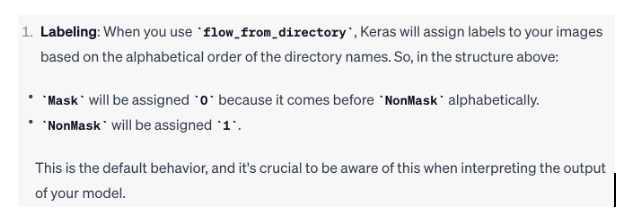

In [7]:
train_data.class_indices

{'Mask': 0, 'Non Mask': 1}

In [8]:
image_class_dict={0:"Mask",1:"Non Mask"}

In [9]:
### Ploting Augmented Images
def plot_random_images():
    images,labels=train_data.next()
    plt.figure(figsize=(20,10))
    for i in range(10):
        plt.subplot(2,5,i+1)
        plt.imshow(images[i])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(image_class_dict[labels[i]])

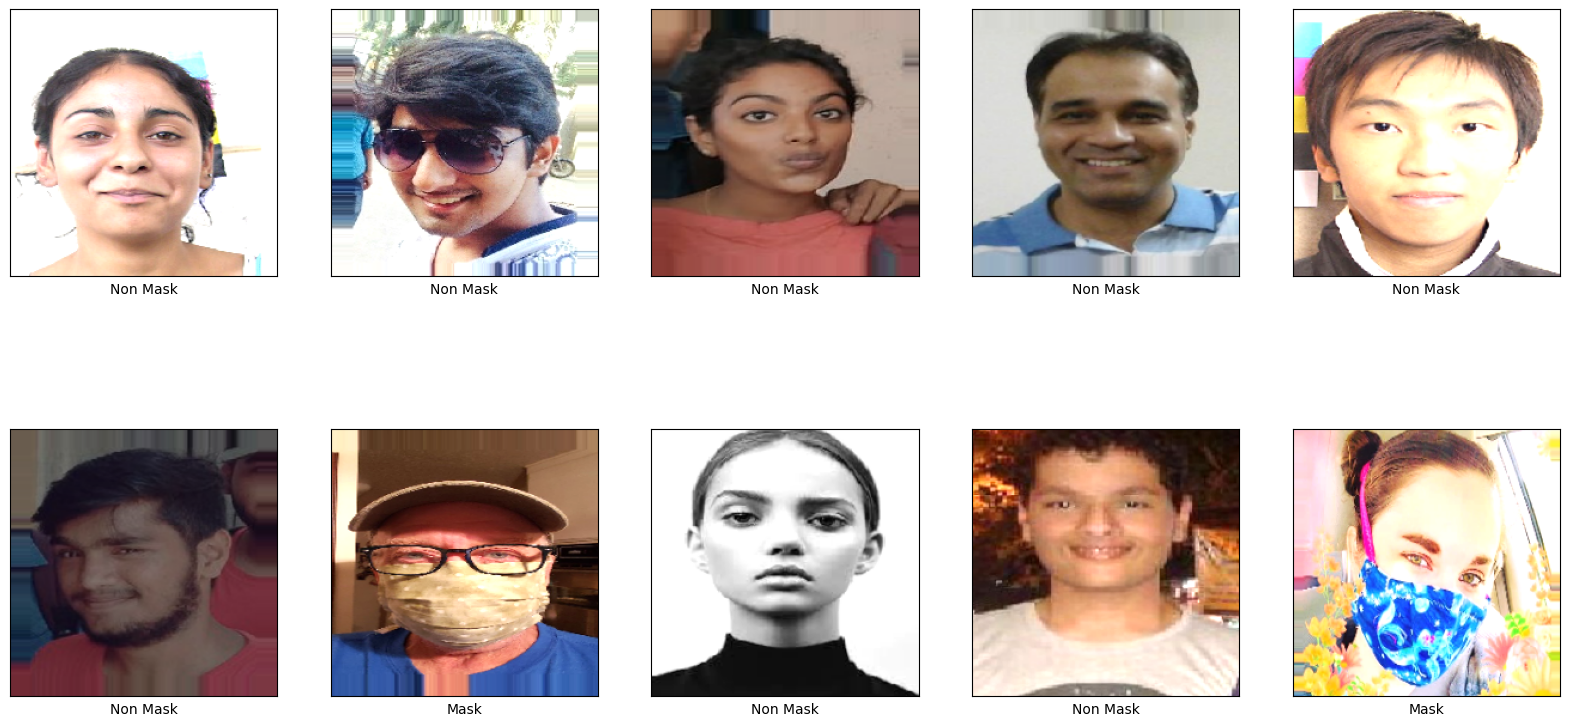

In [10]:
plot_random_images()

### Building Base CNN model

In [11]:
cnn_model=tf.keras.models.Sequential([
    Conv2D(16,3,activation="relu",input_shape=(224,224,3)),
    MaxPooling2D(2,2),
    Conv2D(32,3,activation="relu"),
    MaxPooling2D(2,2),
    Conv2D(64,3,activation="relu"),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(100,activation="relu"),
    Dense(1,activation="sigmoid")
])

2023-10-11 09:58:10.736748: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [13]:
cnn_model.compile(optimizer="adam",loss="binary_crossentropy",metrics="accuracy")

In [14]:
history = cnn_model.fit_generator(train_data,epochs=10,
                                  steps_per_epoch=train_data.samples//BATCH_SIZE,
                                  validation_data=val_data,
                                  validation_steps=val_data.samples//BATCH_SIZE)

Epoch 1/10
18/18 [==============================] - 17s 945ms/step - loss: 0.8731 - accuracy: 0.5827 - val_loss: 0.5388 - val_accuracy: 0.7986
Epoch 2/10
18/18 [==============================] - 16s 903ms/step - loss: 0.4249 - accuracy: 0.8222 - val_loss: 0.4758 - val_accuracy: 0.7569
Epoch 3/10
18/18 [==============================] - 17s 937ms/step - loss: 0.3764 - accuracy: 0.8451 - val_loss: 0.3773 - val_accuracy: 0.8507
Epoch 4/10
18/18 [==============================] - 16s 888ms/step - loss: 0.3028 - accuracy: 0.8785 - val_loss: 0.3949 - val_accuracy: 0.8472
Epoch 5/10
18/18 [==============================] - 16s 890ms/step - loss: 0.2657 - accuracy: 0.8908 - val_loss: 0.3033 - val_accuracy: 0.8993
Epoch 6/10
18/18 [==============================] - 16s 924ms/step - loss: 0.2776 - accuracy: 0.8926 - val_loss: 0.2767 - val_accuracy: 0.8889
Epoch 7/10
18/18 [==============================] - 16s 907ms/step - loss: 0.2531 - accuracy: 0.9102 - val_loss: 0.3263 - val_accuracy: 0.8819

In [15]:
cnn_model.evaluate(test_data)

4/4 [==============================] - 2s 427ms/step - loss: 0.2519 - accuracy: 0.9100


[0.25191447138786316, 0.9100000262260437]

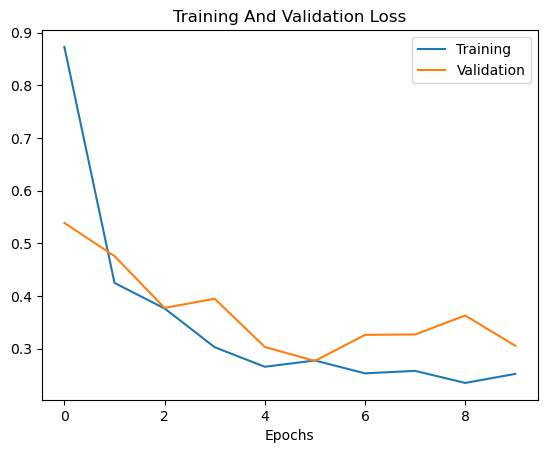

In [17]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Training','Validation'])
plt.title("Training And Validation Loss")
plt.xlabel("Epochs");

In [18]:
from tensorflow.keras.preprocessing import image

In [19]:
test_image = image.load_img('data/mask_ds/Test/mask/2070.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
result

1/1 [==============================] - 0s 77ms/step


array([[0.]], dtype=float32)

In [20]:
print(result[0])

[0.]


In [22]:
test_image = image.load_img('data/mask_ds/Test/Non Mask/real_01032.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 29ms/step
[1.]


In [23]:
test_image = image.load_img('data/mask_ds/Test/Non Mask/real_01040.jpg', target_size = (224,224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)
print(result[0])

1/1 [==============================] - 0s 29ms/step
[1.]


In [24]:
tf.keras.models.save_model(cnn_model,'recognize_mask.h5')